In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss,r2_score
from sklearn.model_selection import train_test_split,KFold , GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer ,make_column_selector
from sklearn.pipeline import Pipeline

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
X = insurance.drop('charges',axis=1)
y = insurance['charges']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3)

In [5]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ct = make_column_transformer((ohe,make_column_selector(dtype_include=object)) ,
                                   ('passthrough',make_column_selector(dtype_exclude=object)),
                                   verbose_feature_names_out=False)
dtr = DecisionTreeRegressor(random_state=24)
pipe = Pipeline([('CT',ct),('DT',dtr)])

In [17]:
params = {'DT__min_samples_split':[2,10,25,10],
         'DT__min_samples_leaf':[1,5,10,25,50],
         'DT__max_depth':[None,4,6]}
kfold = KFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='r2',verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.779 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.705 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.750 total time=   0.0s
[CV 4/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.700 total time=   0.0s
[CV 5/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.712 total time=   0.0s
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.831 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.761 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.783 total time=   0.0s
[CV 4/5] END DT__max_de

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002257A4886E0>),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002257A2D9730>)],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DT__max_depth': [None, 4, 6],
                         'DT__min_samples_leaf': [1, 5, 10, 25, 50],
                         'DT__min_samples_split': [2, 10, 25, 10]},
             scoring='r2', verbose=3)

In [18]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DT__max_depth': 6, 'DT__min_samples_leaf': 50, 'DT__min_samples_split': 2}
0.8519043198478518


In [23]:
best_tree = gcv.best_estimator_

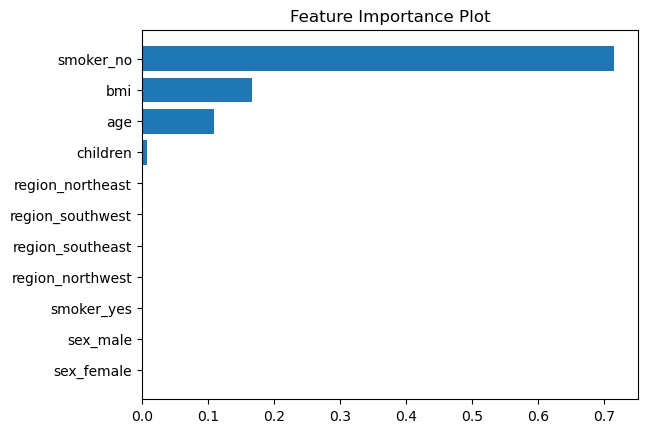

In [24]:
df_imp = pd.DataFrame({'feature':gcv.best_estimator_.named_steps['CT'].get_feature_names_out(),
                       'importance':best_tree.named_steps['DT'].feature_importances_})
df_imp.sort_values('importance',inplace=True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title('Feature Importance Plot')
plt.show()